In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
I=plt.imread('scorpion.jpg')

In [7]:
Teal=np.mean(I,axis=2).astype(np.float64)

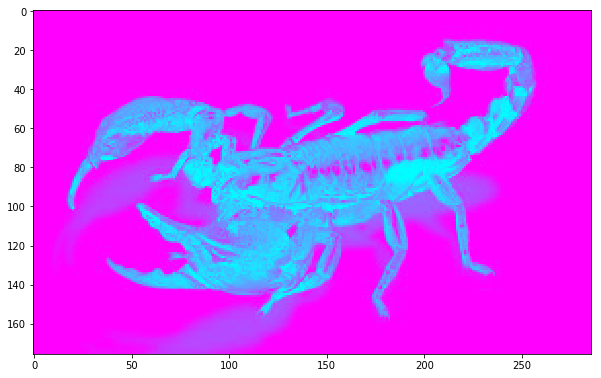

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(Teal, cmap="cool")

In [8]:
I2=plt.imread('scorpion2.jpg')
Teal2=np.mean(I2,axis=2).astype(np.float64)

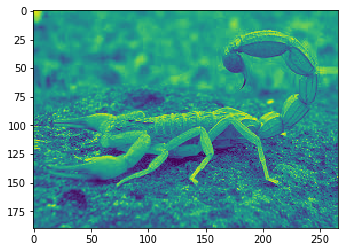

In [9]:
plt.imshow(Teal2)

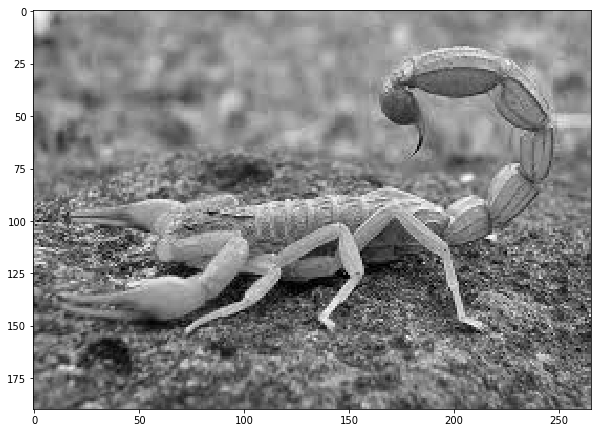

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(Teal2, cmap="gray")

In [26]:
I3=plt.imread('lizard.png')
Teal3=np.mean(I3,axis=2).astype(np.float64)

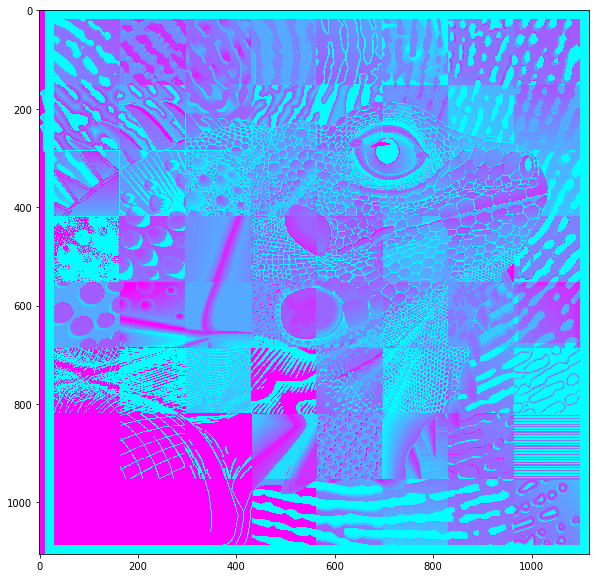

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(Teal3, cmap="cool")

In [38]:
def gaussianblur(sz=5,sigma=1):
    X=np.empty((sz,sz))
    mu = np.round(np.array([sz/2,sz/2]))
    for i in range(sz):
        for j in range(sz):
            pt = np.array([i+1,j+1])
            dist = np.sqrt((pt-mu)@(pt-mu).T)
            X[i,j] = (1/(np.sqrt(2*np.pi*(sigma**2))))\
            *np.exp(-(dist)**2/(2*sigma**2))
    return X

In [62]:
X = gaussianblur(sz=2, sigma=1)

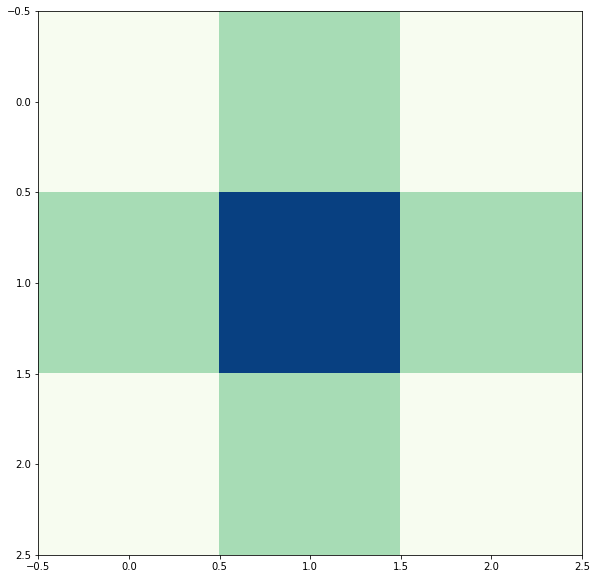

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(X, cmap="GnBu")

In [237]:
def convolute(I,F,stride=1):
    o0=int((I.shape[0]-F.shape[0])/stride)+1
    o1=int((I.shape[1]-F.shape[1])/stride)+1
    out = np.empty((o0,o1))
    cX=0
    cY=0
    for i in range(0,o0,stride):
        cY=0
        for j in range(0,o1,stride):
            out[cX,cY] = np.sum(I[i:i+F.shape[0], j:j+F.shape[1],:]*F)
            cY+=1
        cX+=1
    return out

In [63]:
I2blur=convolute(Teal2,X)

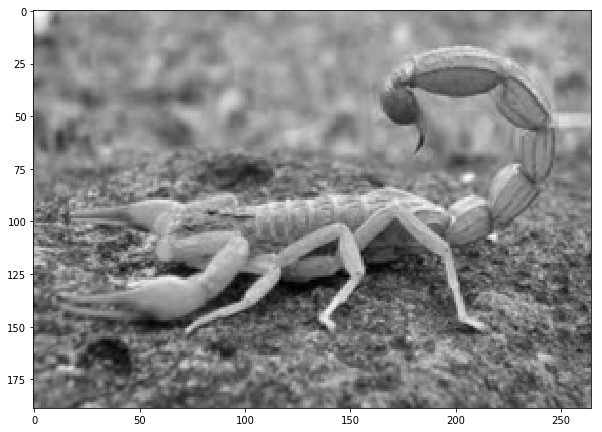

In [64]:
plt.figure(figsize=(10,10))
plt.imshow(I2blur, cmap="gray")

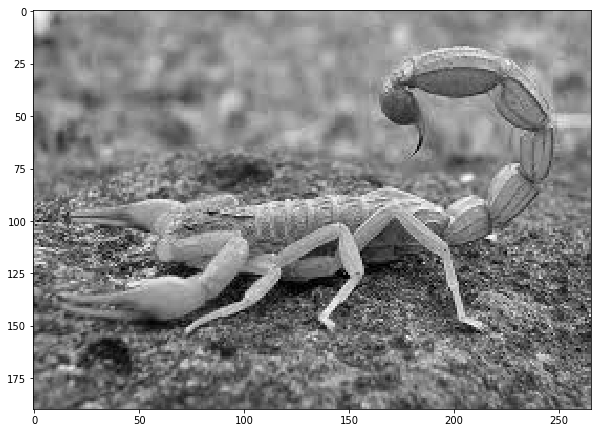

In [61]:
plt.figure(figsize=(10,10))
plt.imshow(Teal2, cmap="gray")

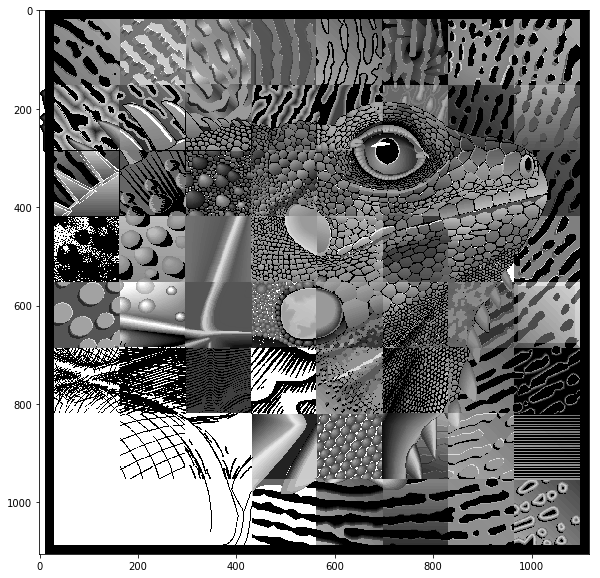

In [65]:
plt.figure(figsize=(10,10))
plt.imshow(Teal3, cmap="gray")

In [66]:
X = gaussianblur(sz=65, sigma=5)

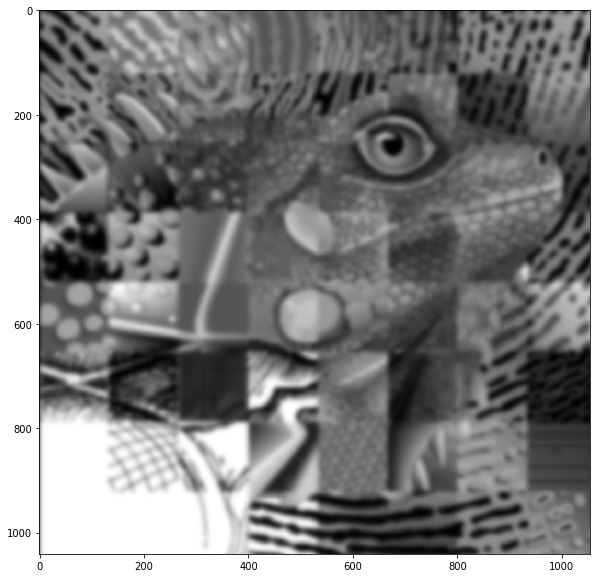

In [67]:
I3blur=convolute(Teal3,X)
plt.figure(figsize=(10,10))
plt.imshow(I3blur, cmap="gray")

In [73]:
def padZeros(I,paddingrows=2,paddingcols=2):
    paddedcols=np.hstack((np.zeros((I.shape[0],paddingcols)),I,np.zeros((I.shape[0],paddingcols))))
    paddedI=np.vstack((np.zeros((paddingrows,paddedcols.shape[1])),paddedcols,np.zeros((paddingrows,paddedcols.shape[1]))))
    return paddedI

In [252]:
def validconvolute(I,F,stride=1):
    padrows=int(np.ceil(((I.shape[0]-1)*stride-I.shape[0]+F.shape[0])/2))
    padcols=int(np.ceil(((I.shape[1]-1)*stride-I.shape[1]+F.shape[1])/2))
    paddedcols=np.hstack((np.zeros((I.shape[0],padcols,I.shape[2])),I,np.zeros((I.shape[0],padcols,I.shape[2]))))
    padI=np.vstack((np.zeros((padrows,paddedcols.shape[1],I.shape[2])),paddedcols,np.zeros((padrows,paddedcols.shape[1],I.shape[2]))))
    return convolute(padI,F,stride=stride)

In [207]:
Teal3.shape

(1105, 1118)

In [208]:
I3Blurred=validconvolute(Teal3,X)

IndexError: tuple index out of range

In [209]:
X.shape

(3, 3)

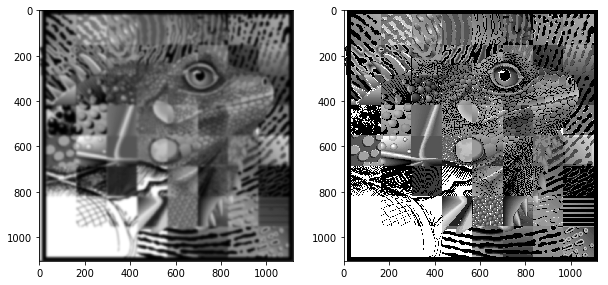

In [157]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I3Blurred, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Teal3, cmap="gray")

In [171]:
X=np.array([[-1,.5,-.5],[.5,-.5,-1],[-.5,-1,.5]])

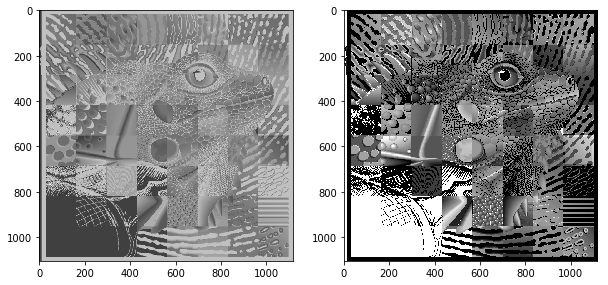

In [172]:
Inverted3=validconvolute(Teal3,X)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(Inverted3, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Teal3, cmap="gray")

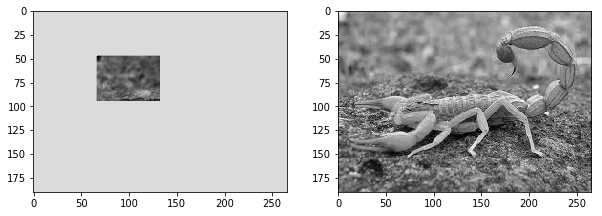

In [186]:
Inverted2=validconvolute(Teal2,X,stride=2)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(Inverted2, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Teal2, cmap="gray")

In [192]:
np.array([X.tolist()]*3).shape

(3, 3, 3)

In [211]:
I2.shape

(190, 266, 3)

(192, 268, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


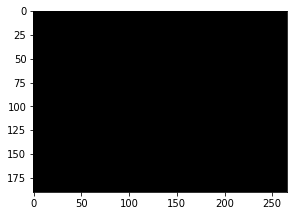

In [210]:
Inverted2=validconvolute(I2,X,stride=1)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(Inverted2)

In [239]:
Inverted2.shape

(190, 266, 3)

In [257]:
X = gaussianblur(sz=10, sigma=5)

In [258]:
X=np.dstack((X,X,X))

In [259]:
X.shape

(10, 10, 3)

In [260]:
Inverted2=validconvolute(I2,X,stride=1)

In [261]:
Iblurred2.shape

(191, 267)

In [321]:
F=np.array([[[1,0,0]]])

In [322]:
F.shape

(1, 1, 3)

In [323]:
I2red=validconvolute(I2,F,stride=1)

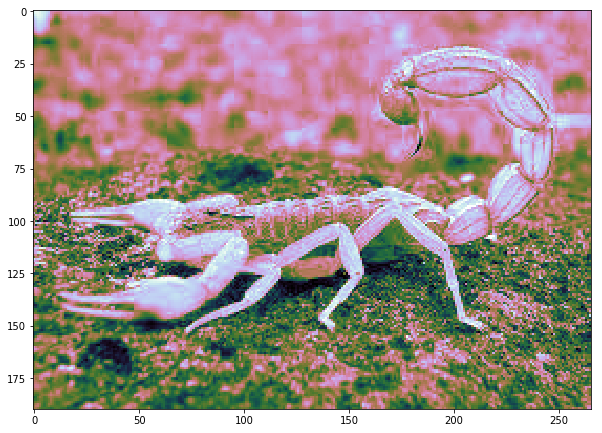

In [324]:
plt.figure(figsize=(10,10))
plt.imshow(I2red, cmap="cubehelix")

In [327]:
I2red

array([[240., 247., 247., ..., 178., 170., 170.],
       [234., 242., 245., ..., 178., 170., 169.],
       [223., 235., 241., ..., 178., 169., 170.],
       ...,
       [120., 132., 140., ..., 137., 130., 131.],
       [127., 140., 143., ..., 144., 161., 162.],
       [127., 130., 122., ..., 122., 170., 172.]])

In [328]:
I2

array([[[240, 248, 235],
        [247, 255, 242],
        [247, 255, 242],
        ...,
        [178, 160, 136],
        [170, 152, 130],
        [170, 152, 132]],

       [[234, 240, 228],
        [242, 250, 237],
        [245, 253, 240],
        ...,
        [178, 160, 136],
        [170, 152, 130],
        [169, 151, 129]],

       [[223, 229, 219],
        [235, 241, 229],
        [241, 249, 236],
        ...,
        [178, 160, 136],
        [169, 151, 127],
        [170, 149, 128]],

       ...,

       [[120, 115, 111],
        [132, 127, 123],
        [140, 135, 131],
        ...,
        [137, 128, 123],
        [130, 119, 113],
        [131, 118, 110]],

       [[127, 122, 118],
        [140, 135, 131],
        [143, 138, 134],
        ...,
        [144, 137, 129],
        [161, 152, 143],
        [162, 152, 143]],

       [[127, 122, 118],
        [130, 125, 121],
        [122, 118, 115],
        ...,
        [122, 115, 107],
        [170, 163, 153],
        [172, 164, 153]]

In [73]:
def maxpooler(I):
    inputshape=len(I.shape)
    o0=int(I.shape[0]/2)
    o1=int(I.shape[1]/2)
    if inputshape<3:
        I=I.reshape(*I.shape,1)
    o3=I.shape[2]
    out = np.empty((o0,o1,o3))
    cX=0
    cY=0
    for i in range(0,I.shape[0],2):
        cY=0
        for j in range(0,I.shape[1],2):
            for k in range(o3):
                out[cX,cY,k] = np.max(I[i:i+2, j:j+2,k])
            cY+=1
        cX+=1
    if inputshape<3:
        out=out[:,:,0]
    return out

In [74]:
pooledteal2=maxpooler(Teal2)

In [75]:
pooledteal2.shape

(95, 133)

In [76]:
Teal2.shape

(190, 266)

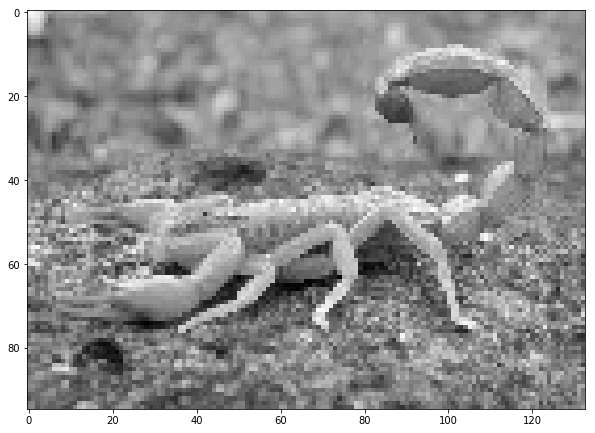

In [77]:
plt.figure(figsize=(10,10))
plt.imshow(pooledteal2, cmap="gray")

In [90]:
def meanpooler(I):
    inputshape=len(I.shape)
    o0=int(I.shape[0]/2)
    o1=int(I.shape[1]/2)
    if inputshape<3:
        I=I.reshape(*I.shape,1)
    o3=I.shape[2]
    out = np.empty((o0,o1,o3))
    cX=0
    cY=0
    for i in range(0,I.shape[0],2):
        cY=0
        for j in range(0,I.shape[1],2):
            for k in range(o3):
                out[cX,cY,k] = np.mean(I[i:i+2, j:j+2,k])
            cY+=1
        cX+=1
    if inputshape<3:
        out=out[:,:,0]
    return out

In [91]:
meanpoolteal2=meanpooler(Teal2)

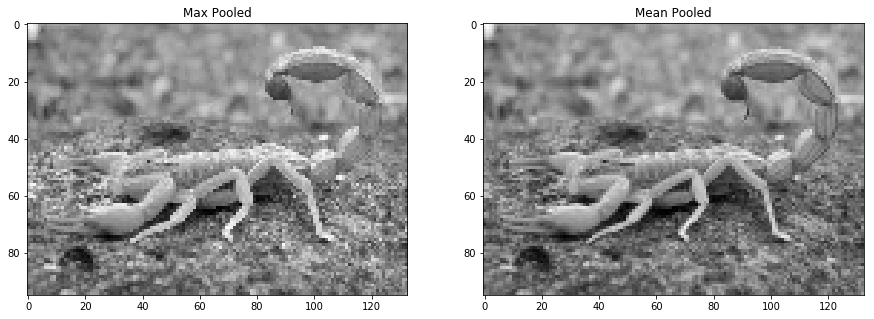

In [92]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(pooledteal2, cmap="gray")
plt.title("Max Pooled")
plt.subplot(1,2,2)
plt.imshow(meanpoolteal2, cmap="gray")
plt.title("Mean Pooled")
plt.show()

In [100]:
meanpoolI2=meanpooler(I2)

In [101]:
meanpoolI2.max()

250.0

In [105]:
maxpoolI2=maxpooler(I2)

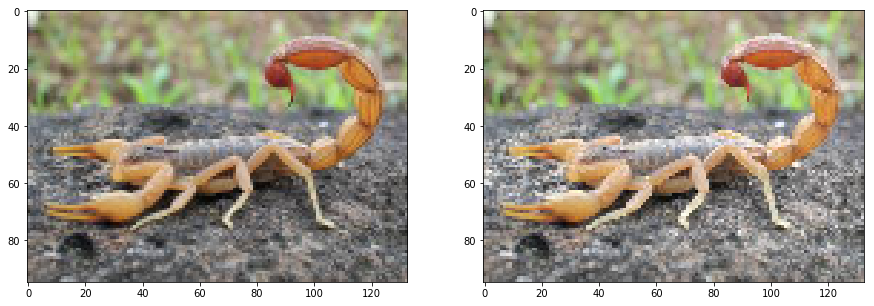

In [107]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(np.rint(meanpoolI2).astype(int))
plt.subplot(1,2,2)
plt.imshow(np.rint(maxpoolI2).astype(int))

In [ ]:
X=[[[[1,1,1,1]]]]

In [ ]:
X.shape